In [1]:
import pandas as pd
import numpy as np
import urllib
from urllib import request
import sklearn 
from statistics import mean 
import statistics
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from datetime import time
from sklearn import feature_selection

In [2]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn import feature_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import label_binarize
from random import seed
from random import randrange
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

C:\Users\chethan\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
import time
import os
from selenium import webdriver
from webbot import Browser
from zipfile import ZipFile

In [4]:
#########################
def scraping_script_prediction():
    global train_year, train_quarter, test_year,test_quarter,year_file_list
    train_year=input('Enter train year')
    train_quarter=input('Enter train quarter')
    test_year=input('Enter test year')
    test_quarter=input('Enter test quarter')
    auto_login()
    year_file_list=zip_file()
    extract_zip()

def auto_login():
    global driver
    driver = Browser()
    driver.go_to('https://freddiemac.embs.com/FLoan/Data/download.php')
    #driver.type('bhagat.san@husky.neu.edu' , into = 'username')
    driver.type('turuvekeresreeniva.c@husky.neu.edu' , into = 'username')
    driver.type('q69{{w?>' , into = 'password')
    driver.click('Submit')
    driver.click(text='', tag='input', id='', classname='accept')
    driver.click('Continue')

def zip_file():
    quarter=['Q1','Q2','Q3','Q4']
    year_file_list=[]
    for i in range(2005,2018):
        for j in quarter:  
            year_file_list.append('historical_data1_'+str(j)+str(i)+'.zip')
    return year_file_list

def download_data(train_year,train_quarter,test_year,test_quarter):
    train=train_quarter+train_year
    test=test_quarter+test_year
    downloaded_files=[]
    for i in year_file_list:
        if test in i:
            driver.click(i)
            #time.sleep(240)
            downloaded_files.append(i)
        if train in i:
            driver.click(i)
            #time.sleep(240)
            downloaded_files.append(i)
    return downloaded_files

def extract_zip():
    downloaded_files=download_data(train_year,train_quarter,test_year,test_quarter)
    time.sleep(240)
    current_path=os.getcwd()
    path=current_path+'\ExtractedFiles'
    #download_path=current_path.split('Desktop')[0]+'\\'
    download_path=current_path.split('Desktop')[0]+'Downloads\\'
    for i in downloaded_files:
        with ZipFile(download_path+i, 'r') as zip:
            zip.extractall(path)
os.getcwd()

'C:\\Users\\chethan\\Desktop\\ADS'

In [35]:
print("Getting DATA")
scraping_script_prediction()

Getting DATA
Enter train year2007
Enter train quarterQ1
Enter test year2016
Enter test quarterQ1


In [36]:
global path

path = os.getcwd()
path_train = path+"\\ExtractedFiles\\historical_data1_"+str(train_quarter)+str(train_year)+".txt"
path_test = path+"\\ExtractedFiles\\historical_data1_"+str(test_quarter)+str(test_year)+".txt"

In [37]:
df_train = pd.read_table(path_train,sep='\|',names = ('fico', 'dt_first_pi', 'flag_fthb', 'dt_matr', 'cd_msa', 'mi_pct',
       'cnt_units', 'occpy_sts', 'cltv', 'dti', 'orig_upb', 'ltv',
       'int_rt', 'channel', 'ppmt_pnlty', 'prod_type', 'st', 'prop_type',
       'zipcode', 'id_loan', 'loan_purpose', 'orig_loan_term', 'cnt_borr',
       'seller_name', 'servicer_name', 'flag_sc', 'Year'),engine='python')

In [38]:
df_test = pd.read_table(path_test,sep='\|',names = ('fico', 'dt_first_pi', 'flag_fthb', 'dt_matr', 'cd_msa', 'mi_pct',
       'cnt_units', 'occpy_sts', 'cltv', 'dti', 'orig_upb', 'ltv',
       'int_rt', 'channel', 'ppmt_pnlty', 'prod_type', 'st', 'prop_type',
       'zipcode', 'id_loan', 'loan_purpose', 'orig_loan_term', 'cnt_borr',
       'seller_name', 'servicer_name', 'flag_sc', 'Year'),engine='python')

In [39]:
df_train.head()


,fico,dt_first_pi,flag_fthb,dt_matr,cd_msa,mi_pct,cnt_units,occpy_sts,cltv,dti,...,prop_type,zipcode,id_loan,loan_purpose,orig_loan_term,cnt_borr,seller_name,servicer_name,flag_sc,Year
0,691,200705,9,203704,40380.0,0,1,P,80,49,...,SF,14600.0,F107Q1000001,C,360,1,Other sellers,Other servicers,NaN,NaN
1,620,200705,9,203704,44140.0,0,1,P,73,32,...,SF,1100.0,F107Q1000002,C,360,1,Other sellers,Other servicers,NaN,NaN
2,644,200703,Y,203702,35644.0,0,2,P,80,42,...,SF,7000.0,F107Q1000003,P,360,2,Other sellers,Other servicers,NaN,NaN
3,757,200703,N,203702,NaN,0,1,P,70,38,...,SF,47500.0,F107Q1000004,C,360,1,Other sellers,Other servicers,NaN,NaN
4,800,200703,N,203702,NaN,0,1,P,43,37,...,MH,4600.0,F107Q1000005,P,360,1,Other sellers,Other servicers,NaN,NaN


In [40]:
df_test.head()

,fico,dt_first_pi,flag_fthb,dt_matr,cd_msa,mi_pct,cnt_units,occpy_sts,cltv,dti,...,prop_type,zipcode,id_loan,loan_purpose,orig_loan_term,cnt_borr,seller_name,servicer_name,flag_sc,Year
0,818,201605,9,204604,33340.0,0,1,P,80,8,...,SF,53200,F116Q1000001,N,360,1,Other sellers,Other servicers,NaN,NaN
1,773,201605,9,203104,33340.0,0,1,P,75,33,...,SF,53100,F116Q1000002,N,180,1,Other sellers,Other servicers,NaN,NaN
2,772,201603,9,204602,36540.0,25,1,P,87,22,...,SF,51500,F116Q1000003,N,360,2,USBANKNA,USBANKNA,NaN,NaN
3,756,201604,9,204603,33340.0,0,1,P,59,32,...,SF,53100,F116Q1000004,N,360,2,Other sellers,Other servicers,NaN,NaN
4,686,201604,9,203603,39820.0,0,1,P,65,41,...,MH,96000,F116Q1000005,C,240,2,Other sellers,Other servicers,NaN,NaN


In [46]:
#######Data Cleaning##########
def cleandata(df):


    
    #To convert the categorical to numerical
    
    df_sccstats = pd.get_dummies(df['occpy_sts'])
    df_sccstats.columns = ['OS_I', 'OS_P', 'OS_S']
    del df_sccstats['OS_I']
    print(df_sccstats.head())
    
    df_channel = pd.get_dummies(df['channel'])
    df_channel.columns = ['C_B', 'C_C', 'C_R','C_T']
    #df_channel.columns = ['C_B', 'C_C', 'C_R']
    del df_channel['C_T']
    print(df_channel.head())
    
    df_ppmt = pd.get_dummies(df['ppmt_pnlty'])
    df_ppmt.columns = ['ppmt_N0', 'ppmt_YES']
    #df_ppmt.columns = ['ppmt_N0']
    del df_ppmt['ppmt_YES']
    print(df_ppmt.head())
    
    df_proptype = pd.get_dummies(df['prop_type'])
    #del df_proptype['99']
    print(df_proptype.head())
    
    df_loanpurpose = pd.get_dummies(df['loan_purpose'])
    print(df_loanpurpose.head())
    
    df_prodtype = pd.get_dummies(df['prod_type'])
    print(df_prodtype.head())
    
    df_fthb = pd.get_dummies(df['flag_fthb'])
    #del df_fthb['9']
    df_fthb.columns = ['fthb_N', 'fthb_Y','fthb_w']
    print("fthb")
    print(df_fthb.head())
    
    df = df.join(df_sccstats)
    df = df.join(df_channel)
    df = df.join(df_ppmt)
    df = df.join(df_prodtype)
    df = df.join(df_proptype)
    df = df.join(df_loanpurpose)
    df = df.join(df_fthb)
    del df['occpy_sts']
    del df['channel']
    del df['ppmt_pnlty']
    del df['prod_type']
    del df['prop_type']
    del df['loan_purpose']
    del df['flag_fthb']
    
    #To fill the missing values
    df['cd_msa'].fillna(value=0,inplace= True)
    df['mi_pct'].fillna(value=999,inplace= True)
    df['cnt_units'].fillna(value=99,inplace= True)
    df['cltv'].fillna(value=999,inplace= True)
    df['dti'].fillna(value=999,inplace= True)
    df['ltv'].fillna(value=999,inplace= True)
    df.fillna(value=0,inplace= True)

    #dropping these features
    del df['id_loan']
    del df['seller_name']
    del df['servicer_name']
    del df['st']
    print("Final columns : ")
    print(df.columns)
    return df

In [42]:
#TO Build the FInal Metrics Table
error_metric_f = pd.DataFrame({'Model_Name':[],
                            'rmse_train':[], 
                            'rmse_test': [],
                            'mae_train': [],
                            'mae_test':[],
                            'mape_train':[],
                            'mape_test':[]})



def metric(modelname,y_train, y_train_predicted, y_test, y_test_predicted):
    global error_metric_f
    
    mae_train=mean_absolute_error(y_train, y_train_predicted)
    mae_test=mean_absolute_error(y_test, y_test_predicted)
    
    
    rmse_train=np.sqrt(mean_squared_error(y_train, y_train_predicted))
    rmse_test=np.sqrt(mean_squared_error(y_test, y_test_predicted))
    
    
    mape_test = np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100
    mape_train = np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100

    df_local = pd.DataFrame({'Model_Name':[modelname],
                            'rmse_train':[rmse_train], 
                            'rmse_test': [rmse_test],
                            'mae_train': [mae_train],
                            'mae_test': [mae_test],
                            'mape_train':[mape_train],
                            'mape_test':[mape_test]})
        
    error_metric_f = pd.concat([error_metric_f, df_local])
    return error_metric_f

In [43]:
#Cleaned Final DataFrame
df_train_cleaned = cleandata(df_train)

df_train_cleaned.head()


   OS_P  OS_S
0     1     0
1     1     0
2     1     0
3     1     0
4     1     0
   C_B  C_C  C_R
0    0    1    0
1    0    1    0
2    0    0    1
3    0    0    1
4    0    0    1
   ppmt_N0
0        1
1        1
2        1
3        1
4        1
   CO  CP  MH  PU  SF
0   0   0   0   0   1
1   0   0   0   0   1
2   0   0   0   0   1
3   0   0   0   0   1
4   0   0   1   0   0
   C  N  P
0  1  0  0
1  1  0  0
2  0  0  1
3  1  0  0
4  0  0  1
   FRM
0    1
1    1
2    1
3    1
4    1
fthb
   fthb_N  fthb_Y  fthb_w
0       1       0       0
1       1       0       0
2       0       0       1
3       0       1       0
4       0       1       0
Final columns : 
Index(['fico', 'dt_first_pi', 'dt_matr', 'cd_msa', 'mi_pct', 'cnt_units',
       'cltv', 'dti', 'orig_upb', 'ltv', 'int_rt', 'zipcode', 'orig_loan_term',
       'cnt_borr', 'flag_sc', 'Year', 'OS_P', 'OS_S', 'C_B', 'C_C', 'C_R',
       'ppmt_N0', 'FRM', 'CO', 'CP', 'MH', 'PU', 'SF', 'C', 'N', 'P', 'fthb_N',
       'fthb_Y', 'fth

,fico,dt_first_pi,dt_matr,cd_msa,mi_pct,cnt_units,cltv,dti,orig_upb,ltv,...,CP,MH,PU,SF,C,N,P,fthb_N,fthb_Y,fthb_w
0,691,200705,203704,40380.0,0,1,80,49,60000,80,...,0,0,0,1,1,0,0,1,0,0
1,620,200705,203704,44140.0,0,1,73,32,105000,73,...,0,0,0,1,1,0,0,1,0,0
2,644,200703,203702,35644.0,0,2,80,42,404000,80,...,0,0,0,1,0,0,1,0,0,1
3,757,200703,203702,0.0,0,1,70,38,83000,70,...,0,0,0,1,1,0,0,0,1,0
4,800,200703,203702,0.0,0,1,43,37,54000,43,...,0,1,0,0,0,0,1,0,1,0


In [47]:
df_test_cleaned = cleandata(df_test)
df_test_cleaned.head()

   OS_P  OS_S
0     1     0
1     1     0
2     1     0
3     1     0
4     1     0
   C_B  C_C  C_R
0    0    0    1
1    0    0    1
2    0    1    0
3    0    0    1
4    0    0    1
   ppmt_N0
0        1
1        1
2        1
3        1
4        1
   CO  CP  MH  PU  SF
0   0   0   0   0   1
1   0   0   0   0   1
2   0   0   0   0   1
3   0   0   0   0   1
4   0   0   1   0   0
   C  N  P
0  0  1  0
1  0  1  0
2  0  1  0
3  0  1  0
4  1  0  0
   FRM
0    1
1    1
2    1
3    1
4    1
fthb
   fthb_N  fthb_Y  fthb_w
0       1       0       0
1       1       0       0
2       1       0       0
3       1       0       0
4       1       0       0
Final columns : 
Index(['fico', 'dt_first_pi', 'dt_matr', 'cd_msa', 'mi_pct', 'cnt_units',
       'cltv', 'dti', 'orig_upb', 'ltv', 'int_rt', 'zipcode', 'orig_loan_term',
       'cnt_borr', 'flag_sc', 'Year', 'OS_P', 'OS_S', 'C_B', 'C_C', 'C_R',
       'ppmt_N0', 'FRM', 'CO', 'CP', 'MH', 'PU', 'SF', 'C', 'N', 'P', 'fthb_N',
       'fthb_Y', 'fth

,fico,dt_first_pi,dt_matr,cd_msa,mi_pct,cnt_units,cltv,dti,orig_upb,ltv,...,CP,MH,PU,SF,C,N,P,fthb_N,fthb_Y,fthb_w
0,818,201605,204604,33340.0,0,1,80,8,80000,80,...,0,0,0,1,0,1,0,1,0,0
1,773,201605,203104,33340.0,0,1,75,33,118000,75,...,0,0,0,1,0,1,0,1,0,0
2,772,201603,204602,36540.0,25,1,87,22,157000,87,...,0,0,0,1,0,1,0,1,0,0
3,756,201604,204603,33340.0,0,1,59,32,325000,59,...,0,0,0,1,0,1,0,1,0,0
4,686,201604,203603,39820.0,0,1,65,41,125000,65,...,0,1,0,0,1,0,0,1,0,0


In [48]:
#Creating Test and Train data
yt = df_train_cleaned['int_rt']
del df_train_cleaned['int_rt']
ytest = df_test_cleaned['int_rt']
del df_test_cleaned['int_rt']
X_train = df_train_cleaned
X_test = df_test_cleaned
y_train = yt
y_test = ytest

In [1]:
#del X_train['C_T']
#del X_test['flag_sc']
#del X_train['flag_sc']
#del X_train['99']

In [50]:
#Best Model From TPOT
RM = RandomForestRegressor(bootstrap=True, max_features=0.3, min_samples_leaf=6, min_samples_split=4, n_estimators=100)

In [51]:
RM.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.3, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=6, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [52]:
ypred_best_test = RM.predict(X_test)


In [53]:
ypred_best_train = RM.predict(X_train)

In [54]:
#Metric Calculation

In [55]:
metric('RandomForest - test -'+str(test_quarter)+str(test_year)+" - train - "+str(train_quarter)+str(train_year), y_train,ypred_best_train,y_test,ypred_best_test)

,Model_Name,rmse_train,rmse_test,mae_train,mae_test,mape_train,mape_test
0,RandomForest - test -Q12016 - train - Q12007,0.236009,2.141348,0.174644,2.105902,2.812941,54.876562


In [56]:
X_test.columns

Index(['fico', 'dt_first_pi', 'dt_matr', 'cd_msa', 'mi_pct', 'cnt_units',
       'cltv', 'dti', 'orig_upb', 'ltv', 'zipcode', 'orig_loan_term',
       'cnt_borr', 'Year', 'OS_P', 'OS_S', 'C_B', 'C_C', 'C_R', 'ppmt_N0',
       'FRM', 'CO', 'CP', 'MH', 'PU', 'SF', 'C', 'N', 'P', 'fthb_N', 'fthb_Y',
       'fthb_w'],
      dtype='object')

In [57]:
ypred_best_test

array([6.18398689, 5.95473177, 6.18056326, ..., 6.06720946, 5.95377885,
       6.16954053])

In [58]:
y_test.values

array([3.75 , 3.   , 3.95 , ..., 4.1  , 4.165, 4.165])

In [59]:
X_test.columns

Index(['fico', 'dt_first_pi', 'dt_matr', 'cd_msa', 'mi_pct', 'cnt_units',
       'cltv', 'dti', 'orig_upb', 'ltv', 'zipcode', 'orig_loan_term',
       'cnt_borr', 'Year', 'OS_P', 'OS_S', 'C_B', 'C_C', 'C_R', 'ppmt_N0',
       'FRM', 'CO', 'CP', 'MH', 'PU', 'SF', 'C', 'N', 'P', 'fthb_N', 'fthb_Y',
       'fthb_w'],
      dtype='object')

In [60]:
X_train.columns

Index(['fico', 'dt_first_pi', 'dt_matr', 'cd_msa', 'mi_pct', 'cnt_units',
       'cltv', 'dti', 'orig_upb', 'ltv', 'zipcode', 'orig_loan_term',
       'cnt_borr', 'Year', 'OS_P', 'OS_S', 'C_B', 'C_C', 'C_R', 'ppmt_N0',
       'FRM', 'CO', 'CP', 'MH', 'PU', 'SF', 'C', 'N', 'P', 'fthb_N', 'fthb_Y',
       'fthb_w'],
      dtype='object')

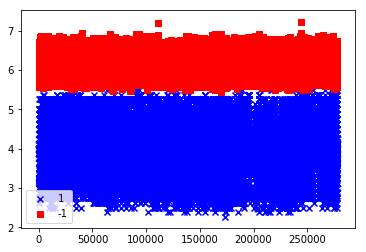

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X_test.index,y_test, c='b', marker='x', label='1')
plt.scatter(X_test.index, ypred_best_test, c='r', marker='s', label='-1')
plt.legend(loc='lower left')
plt.show()